In [1]:
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Linear Regression

In [2]:
num_samples = 1_000
low, high = -10, 10
# y = ax + b
a, b = 35, 500
batch_size = 32
lr = 0.01
X = np.random.uniform(low, high, num_samples)
noise = np.random.normal(size=num_samples, scale=100)
Y = a*X + b + noise

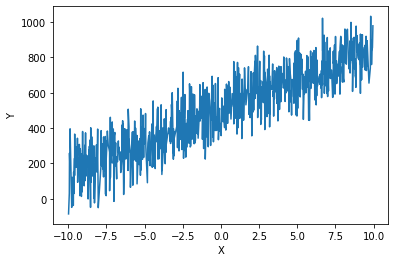

In [3]:
df = pd.DataFrame({"X": X, "Y": Y})
sns.lineplot(x="X", y="Y", data=df)

In [4]:
a_predicted = -200 
b_predicted = -45
n_epochs = 1000
batch_size = 32
lr = 0.01
for epoch in range(n_epochs):
    for step in range(0, num_samples, batch_size):
        da = (-(Y[step:(step+batch_size)] - a_predicted*X[step:(step+batch_size)] - b_predicted)*X[step:(step+batch_size)]).mean()
        db = -(Y[step:(step+batch_size)] - a_predicted*X[step:(step+batch_size)] - b_predicted).mean()
        a_predicted -= lr*da
        b_predicted -= lr*db
    if epoch % 100 == 0 and epoch != 0:
        lr /= 10
        print("Epoch = ", epoch)
        print("a = {:.2f}".format(a), "a_pred = {:.2f}".format(a_predicted))
        print("b = {:.2f}".format(b), "a_pred = {:.2f}".format(b_predicted))
print("Final predictions after {} epochs!".format(n_epochs))
print("a = {:.2f}".format(a), "a_pred = {:.2f}".format(a_predicted))
print("b = {:.2f}".format(b), "a_pred = {:.2f}".format(b_predicted))

Epoch =  100
a = 35.00 a_pred = 31.72
b = 500.00 a_pred = 499.50
Epoch =  200
a = 35.00 a_pred = 34.26
b = 500.00 a_pred = 499.85
Epoch =  300
a = 35.00 a_pred = 34.55
b = 500.00 a_pred = 499.86
Epoch =  400
a = 35.00 a_pred = 34.57
b = 500.00 a_pred = 499.86
Epoch =  500
a = 35.00 a_pred = 34.57
b = 500.00 a_pred = 499.86
Epoch =  600
a = 35.00 a_pred = 34.58
b = 500.00 a_pred = 499.86
Epoch =  700
a = 35.00 a_pred = 34.58
b = 500.00 a_pred = 499.86
Epoch =  800
a = 35.00 a_pred = 34.58
b = 500.00 a_pred = 499.86
Epoch =  900
a = 35.00 a_pred = 34.58
b = 500.00 a_pred = 499.86
Final predictions after 1000 epochs!
a = 35.00 a_pred = 34.58
b = 500.00 a_pred = 499.86


## Logistic Regression

In [5]:
num_samples = 1000
batch_size = 64
X1 = np.random.normal(size=(num_samples,2), scale=10,loc = (50, 5))
X2 = np.random.normal(size=(num_samples,2), scale=10,loc = (-20, -30))
X = np.concatenate([X1, X2])
Y = np.ones(2*num_samples)
Y[:num_samples] = 0
Y[num_samples:] = 1
indexes = np.arange(2*num_samples)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print(X.shape, Y.shape)

def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

def der_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

(2000, 2) (2000,)


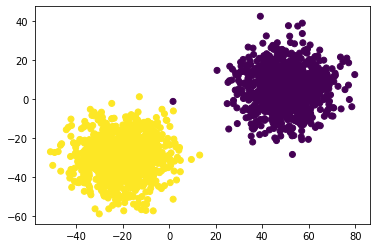

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [7]:
a_pred = np.array([-5., 3]).reshape(2, 1)
b_pred = np.array([-120.])
lr = 0.1
for epoch in range(3000):
    for step in range(0, num_samples, batch_size):
        x_batch = X[step:(step+batch_size)]
        diff = -(Y[step:(step+batch_size), None] - sigmoid(x_batch.dot(a_pred) + b_pred))
        da = (x_batch.T.dot(diff))
        db = diff.mean()
        a_pred -= lr*da.reshape(2, 1)
        b_pred -= lr*db.reshape(1,)
    if epoch % 1000 == 0:
        lr /= 10
        Y_predicted = (sigmoid(X.dot(a_pred) + b_pred) > 0.5).astype(np.int8)
        accuracy = (Y_predicted[:, 0] == Y).mean()
        print("Accuracy = {} on epoch = {}".format(accuracy, epoch))

Accuracy = 1.0 on epoch = 0
Accuracy = 1.0 on epoch = 1000
Accuracy = 1.0 on epoch = 2000


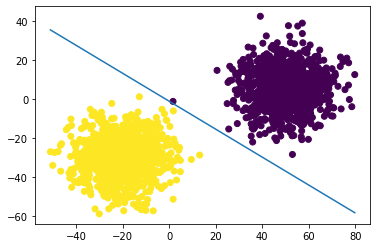

In [8]:
X_sorted = np.array(X[:, 0])
X_sorted.sort()
Y_pred = -(a_pred[0]/a_pred[1])*X_sorted - (b_pred/a_pred[1])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(X_sorted, Y_pred)

In [9]:
Y_predicted = (sigmoid(X.dot(a_pred) + b_pred) > 0.5).astype(np.int8)
print("Accuracy = ", (Y_predicted[:, 0] == Y).mean())

Accuracy =  1.0


# Decision tree

In [10]:
def check_purity(data):
    """
    data: numpy array - size n*(m+1), last column - true labels
    return: Bool - if data pure(has only one class in labels)
    """
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False


def classify_data(data):
    """
    data: numpy array - size n*(m+1), last column - true labels
    return: float - the most frequent class in labels
    """
    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification


def get_potential_splits(data):

    potential_splits = dict()
    _, n_columns = data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index] = list()
        values = data[:, column_index]
        unique_value = np.unique(values)
        for index in range(len(unique_value)):
            if index != 0:
                current_value = unique_value[index]
                previous_value = unique_value[index - 1]
                potential_split = (current_value + previous_value)/2
                potential_splits[column_index].append(potential_split)
    return potential_splits


def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    return data_below,data_above


def calculate_entropy(data):
    
    label_column = data[:,-1]
    _, counts = np.unique(label_column, return_counts = True)
    
    probabilities = counts / counts.sum()
    entropy = 1 - sum(probabilities**2)
    
    return entropy


def calculate_overall_entropy(data_below, data_above):
    
    n_data_points = len(data_above) + len(data_below)
    
    p_data_below = len(data_below)/ n_data_points
    p_data_above = len(data_above)/ n_data_points
    
    overall_entropy = (p_data_below*calculate_entropy(data_below) + p_data_above*calculate_entropy(data_above))
    
    return overall_entropy


def determine_best_split(data, potential_splits):
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column = column_index, split_value = value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)
            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
            
    return best_split_column, best_split_value



def decision_tree_algorithm(data, counter=0, max_depth=2):
    
    if check_purity(data):
        classification = classify_data(data)
        return classification
    
    # recursive part
    else:
        counter += 1
        
        # helper function
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        # sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
        
        # find answers (recursion)
        if counter < max_depth:
            yes_answer = decision_tree_algorithm(data_below, counter=counter)
            no_answer = decision_tree_algorithm(data_above, counter=counter)
        else:
            yes_answer = classify_data(data_below)
            no_answer = classify_data(data_above)
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree
    
    
def predict_on_one_sample(x, tree):
    new_tree = tree.copy()
    while True:
        for condition, v in new_tree.items():
            split_column = int(condition[0])
            split_value = float(condition[5:])
            break
        if x[split_column] <= split_value:
            if isinstance(v[0], dict):
                new_tree = v[0]
            else:
                return v[0]
        else:
            if isinstance(v[1], dict):
                new_tree = v[1]
            else:
                return v[1]
            

def predict(X, tree):
    assert len(X.shape) == 2
    Y_prediction = np.empty((X.shape[0], 1))
    for i in range(X.shape[0]):
        Y_prediction[i] = predict_on_one_sample(X[i], tree)
    return Y_prediction

In [11]:
num_samples = 1000
lr = 0.1
X1 = np.random.normal(size=(num_samples,2), scale=10,loc = (10, 5))
X2 = np.random.normal(size=(num_samples,2), scale=10,loc = (-20, -30))
X = np.concatenate([X1, X2])
Y = np.ones(2*num_samples)
Y[:num_samples] = 0
Y[num_samples:] = 1
indexes = np.arange(2*num_samples)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
print(X.shape, Y.shape)

(2000, 2) (2000,)


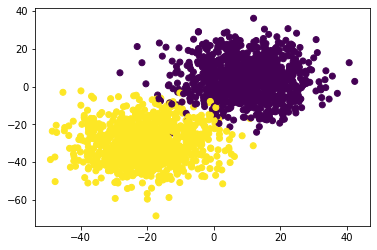

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [13]:
data = np.concatenate([X, Y.reshape(X.shape[0], 1)], axis=1)
tree = decision_tree_algorithm(data)

In [14]:
Y_predicted = predict(X, tree)
print("Accuracy = ", (Y_predicted[:, 0] == Y).mean())

Accuracy =  0.9785
